In [1]:
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, roc_auc_score, f1_score, recall_score, precision_recall_curve, auc, average_precision_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV
import xlsxwriter
from random import randint
random_state = 7656
from preprocessing import stds, stats, cv_preprocessing
from load_data import load_data
import os
from scipy.stats import mode
from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
#from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

## Multi Cat-Boost

In [2]:
pcls = ["q6.1_INTRU", "q6.2_DREAM", "q6.3_FLASH", "q6.4_UPSET",
               "q6.5_PHYS", "q6.6_AVTHT", "q6.7_AVSIT", "q6.8_AMNES", "q6.9_DISINT",
               "q6.10_DTACH", "q6.11_NUMB", "q6.12_FUTRE", "q6.13_SLEEP",
               "q6.14_ANGER", "q6.15_CONC", "q6.16_HYPER", "q6.17_STRTL"]
phqs = [f"T1q5.{i}" for i in range(1, 10)]
phqs2 = [f"T1q5.{i}_" for i in range(1, 10)]


In [3]:
df_preprocessed, features, target_feature = load_data()



In [4]:
target_feature

['PCL_Strict3',
 'target_tred',
 'target_intrusion',
 'target_avoidance',
 'target_hyper',
 'phq3',
 'target_binary_intrusion',
 'q6.1_INTRU_target',
 'q6.2_DREAM_target',
 'q6.3_FLASH_target',
 'q6.4_UPSET_target',
 'q6.5_PHYS_target']

In [5]:
df_preprocessed['target_binary_intrusion'].sum()

130.0

In [6]:
df_preprocessed['target_binary_tred'].sum()

KeyError: 'target_binary_tred'

In [9]:
target_feature

['PCL_Strict3',
 'target_tred',
 'target_intrusion',
 'target_avoidance',
 'target_hyper',
 'phq3',
 'target_binary_intrusion',
 'q6.1_INTRU_target',
 'q6.2_DREAM_target',
 'q6.3_FLASH_target',
 'q6.4_UPSET_target',
 'q6.5_PHYS_target']

average_precision_score = 0.5608059611370312
pr_auc = 0.5503725823813641


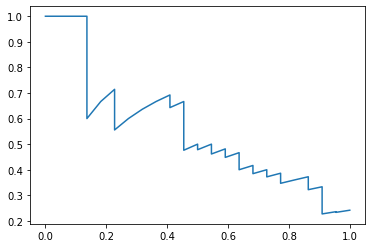

holdout i = , roc_auc = 0.7630303030303031
f


C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:773: RuntimeWarning: invalid value encountered in true_divide
  dfbetas /= np.sqrt(self.sigma2_not_obsi[:, None])


average_precision_score = 0.4304427163082465
pr_auc = 0.41427512012494744


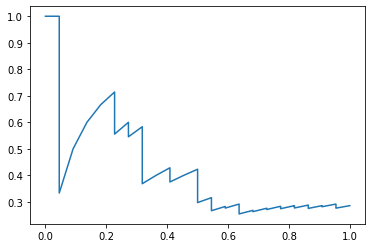

holdout i = , roc_auc = 0.6695331695331695
f


C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:773: RuntimeWarning: invalid value encountered in true_divide
  dfbetas /= np.sqrt(self.sigma2_not_obsi[:, None])


average_precision_score = 0.6227757463299992
pr_auc = 0.6145601274325538


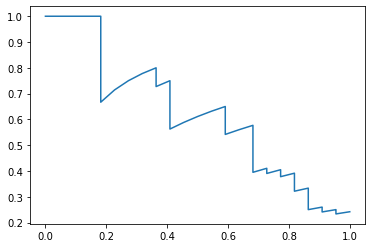

holdout i = , roc_auc = 0.7764127764127764
f


C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:773: RuntimeWarning: divide by zero encountered in true_divide
  dfbetas /= np.sqrt(self.sigma2_not_obsi[:, None])


average_precision_score = 0.3807073597826457
pr_auc = 0.36578200584947507


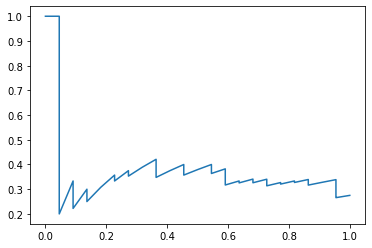

holdout i = , roc_auc = 0.7027027027027027
f
average_precision_score = 0.5142349693619591
pr_auc = 0.503047067020856


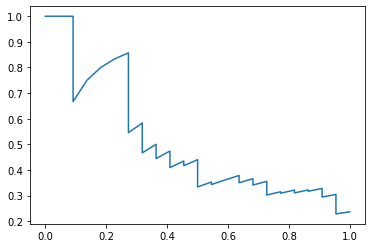

holdout i = , roc_auc = 0.7223587223587224
f


In [8]:
df_preprocessed, features, target_feature = load_data()
df_preprocessed[phqs2] = 0
df_preprocessed[phqs2] = df_preprocessed[phqs] + 1
df_preprocessed['blop1'] = mode(df_preprocessed[phqs2+pcls], axis=1)[0] > 1
df_preprocessed['blop2'] = mode(df_preprocessed[pcls], axis=1)[0]
df_preprocessed['blop3'] = mode(df_preprocessed[phqs2], axis=1)[0]
features.extend(['blop1', 'blop2'])
#df_preprocessed = df_preprocessed[df_preprocessed['intrusion_PCL_T1']==1]
#features2 = [i for i in features if i not in phqs+pcls]


for j in range(1):
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features], df_preprocessed['target_binary_intrusion'],\
                                          test_size=0.15,\
                                          stratify=df_preprocessed['target_binary_intrusion'])


    cv = StratifiedKFold(5)

    for train, test in cv.split(X, Y):
        
        x_train, y_train = X.iloc[train], Y.iloc[train]
        x_test, y_test = X.iloc[test], Y.iloc[test]
             
        x_train, x_test = cv_preprocessing(x_train, x_test)
        x_train['blop3'] = x_train[[i for i in x_train.columns if 'outlier' in i]].sum(axis=1)
        x_test['blop3'] = x_test[[i for i in x_test.columns if 'outlier' in i]].sum(axis=1)


        rfe = RFE(RandomForestClassifier(), n_features_to_select=30)
        model = CatBoostClassifier(verbose=0, class_weights={0:15, 1:1}, l2_leaf_reg=150)
#         x_train = rfe.fit_transform(x_train,y_train)
#         x_test = rfe.transform(x_test)
        model.fit(x_train,y_train)
        
        y_pred = model.predict_proba(x_test)[:,1]


        #print(f1_score(y_test.astype(int), y_pred))
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred)
        avs = average_precision_score(y_test.astype(int), y_pred)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
        print(f"holdout i = , roc_auc = {roc_auc_score(y_test.astype(int), y_pred)}")
        print('f')

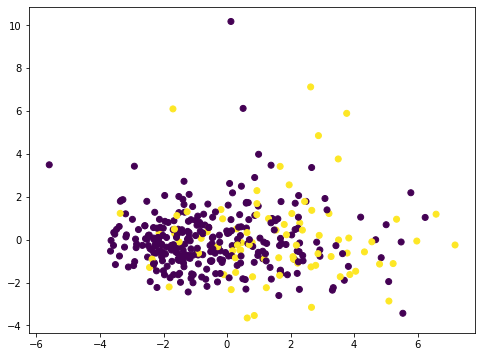

In [12]:
features2 = data[:15].index
pca2 = PCA(n_components=2)
pca2.fit(x_train[features2])
x_3d = pca2.transform(x_train[features2])

plt.figure(figsize=(8,6))
#z_train = x_train["ID"].apply(lambda x: x in [2125.0, 1116.0, 1179.0, 1403.0])
plt.scatter(x_3d[:,0], x_3d[:,1], c=y_train)
plt.show()

<AxesSubplot:>

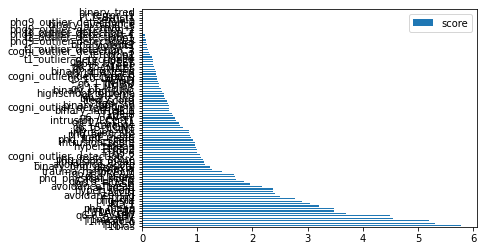

In [10]:
feature_important = model.get_feature_importance()
keys = list(x_train.columns)
values = feature_important

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [ ]:
data[:5]

In [14]:
print(y_test.iloc[y_pred.argmax()])
print(y_pred.argmax())
X.iloc[test].iloc[y_pred.argmax()]["ID"]

1.0
16


KeyError: 'ID'

In [ ]:
x_test.iloc[y_pred.argmax()][0:20]

In [ ]:
features

In [ ]:
df_preprocessed[(df_preprocessed["ID"] == 2125.0)|(df_preprocessed["ID"] == 1116.0)][features2[:20]]

In [ ]:
plt.scatter(df_preprocessed['avoidance_score'], df_preprocessed['phq_an_score'], c=df_preprocessed['target_binary_intrusion'])

In [ ]:
2125.0
1116.0
